# Import libaries and load data

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from tabulate import tabulate

In [2]:
# import the telco dataset
telco_data = pd.read_csv('telco.csv')
telco_data.head()

,CustomerID,Gender,Age,Under30,SeniorCitizen,Married,Dependents,NumberofDependents,Country,State,...,TotalExtraDataCharges,TotalLongDistanceCharges,TotalRevenue,SatisfactionScore,CustomerStatus,ChurnLabel,ChurnScore,CLTV,ChurnCategory,ChurnReason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges


In [3]:
#Load the data into a data frame
df = pd.read_csv('telco.csv')
df.head(7)

,CustomerID,Gender,Age,Under30,SeniorCitizen,Married,Dependents,NumberofDependents,Country,State,...,TotalExtraDataCharges,TotalLongDistanceCharges,TotalRevenue,SatisfactionScore,CustomerStatus,ChurnLabel,ChurnScore,CLTV,ChurnCategory,ChurnReason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges
5,4412-YLTKF,Female,72,No,Yes,No,Yes,1,United States,California,...,10,89.91,2235.41,1,Churned,Yes,95,4638,Competitor,Competitor had better devices
6,0390-DCFDQ,Female,76,No,Yes,Yes,Yes,2,United States,California,...,0,15.28,85.73,2,Churned,Yes,76,3964,Other,Don't know


Looking at the top five rows of our data we can see all our features as well as the types of data we are working with.

Some of the features are:

    Customer ID
    Gender
    Age
    Under 30
    Senior Citizen
    Married
    Dependents
    Number of Dependents

# Exploratory Data Analysis

The types of visualisations we can create differ depending on the data type of each variable. Broadly, we need to determine whether a variable is numerical, or categorical. Some of the categorical features are CustomerID, Gender, Under30, SeniorCitizen, Married, Dependents, Country, State. Age, NumberofDependents, ZipCode, Latitude, Longitude, Population, NumberofReferrals, TenureinMonths are numerical. This is confirmed by looking specifically at the data type of each feature.

In [5]:
#show the number of columns and Rows
df.shape

(7043, 50)

In [6]:
# show all the columns in the dataset
df.columns.values

array(['CustomerID', 'Gender', 'Age', 'Under30', 'SeniorCitizen',
       'Married', 'Dependents', 'NumberofDependents', 'Country', 'State',
       'City', 'ZipCode', 'Latitude', 'Longitude', 'Population',
       'Quarter', 'ReferredaFriend', 'NumberofReferrals',
       'TenureinMonths', 'Offer', 'PhoneService',
       'AvgMonthlyLongDistanceCharges', 'MultipleLines',
       'InternetService', 'InternetType', 'AvgMonthlyGBDownload',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtectionPlan',
       'PremiumTechSupport', 'StreamingTV', 'StreamingMovies',
       'StreamingMusic', 'UnlimitedData', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharge', 'TotalCharges', 'TotalRefunds',
       'TotalExtraDataCharges', 'TotalLongDistanceCharges',
       'TotalRevenue', 'SatisfactionScore', 'CustomerStatus',
       'ChurnLabel', 'ChurnScore', 'CLTV', 'ChurnCategory', 'ChurnReason'],
      dtype=object)

In [7]:
df.columns = df.columns.str.replace(' ', '')

In [8]:
df.columns.values

array(['CustomerID', 'Gender', 'Age', 'Under30', 'SeniorCitizen',
       'Married', 'Dependents', 'NumberofDependents', 'Country', 'State',
       'City', 'ZipCode', 'Latitude', 'Longitude', 'Population',
       'Quarter', 'ReferredaFriend', 'NumberofReferrals',
       'TenureinMonths', 'Offer', 'PhoneService',
       'AvgMonthlyLongDistanceCharges', 'MultipleLines',
       'InternetService', 'InternetType', 'AvgMonthlyGBDownload',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtectionPlan',
       'PremiumTechSupport', 'StreamingTV', 'StreamingMovies',
       'StreamingMusic', 'UnlimitedData', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharge', 'TotalCharges', 'TotalRefunds',
       'TotalExtraDataCharges', 'TotalLongDistanceCharges',
       'TotalRevenue', 'SatisfactionScore', 'CustomerStatus',
       'ChurnLabel', 'ChurnScore', 'CLTV', 'ChurnCategory', 'ChurnReason'],
      dtype=object)

In [9]:
def map_dtype(dtype):
    if pd.api.types.is_string_dtype(dtype):
        return 'string'
    elif pd.api.types.is_integer_dtype(dtype):
        return 'integer'
    elif pd.api.types.is_float_dtype(dtype):
        return 'float'
    elif pd.api.types.is_bool_dtype(dtype):
        return 'boolean'
    else:
        return 'unknown'

# Create a DataFrame with attribute names and their general data types
attribute_info = pd.DataFrame({
    'Attribute': df.columns,
    'Data Type': [map_dtype(dtype) for dtype in telco_data.dtypes]
})

attribute_info['Description'] = [
     "Unique identifier for each customer",
    "The gender of the customer (Male, Female)",
    "Age of the customer",
    "Is the customer less than 30 years old?",
    "Is the customer less a Senior Citizen?",
    "Is the customer Married?",
    "Does the customer have dependents?",
    "Number of dependents the customer has",
    "Country of the customer",
    "State of the customer",
    "City of the customer",
    "Zip Code of the customer",
    "Latitude of the customer",
    "Longitude of the customer",
    "Population",
    "Quarter",
    "Referred a Friend",
    "Number of Referrals",
    "The number of months the customer has been with the company",
    "Type of Offer",
    "The type of phone service",
    "Average Monthly Long Distance Charges",
    "Multiple Lines",
    "Internet Service",
    "Internet Type",
    "Average Monthly Gigabyte Download",
    "Online Security",
    "Online Backup",
    "Device Protection Plan",
    "Premium Tech Support",
    "Streaming TV",
    "Streaming Movies",
    "Streaming Music",
    "Unlimited Data",
    "Contract",
    "Paperless Billing",
    "Payment Method",
    "Monthly Charge",
    "Total Charges",
    "Total Refunds",
    "Total Extra Data Charges",
    "Total Long Distance Charges",
    "Total Revenue",
    "Satisfaction Score",
    "Customer Status",
    "Churn Label",
    "Churn Score",
    "CLTV",
    "Churn Category",
    "Churn Reason"
        ]

attribute_info

,Attribute,Data Type,Description
0,CustomerID,string,Unique identifier for each customer
1,Gender,string,"The gender of the customer (Male, Female)"
2,Age,integer,Age of the customer
3,Under30,string,Is the customer less than 30 years old?
4,SeniorCitizen,string,Is the customer less a Senior Citizen?
5,Married,string,Is the customer Married?
6,Dependents,string,Does the customer have dependents?
7,NumberofDependents,integer,Number of dependents the customer has
8,Country,string,Country of the customer
9,State,string,State of the customer


The initial phase of the analysis involves non-graphical exploration. During this stage, we focus on descriptive statistics for each feature. Descriptive statistics for numerical features can be obtained using the command:

df.describe()
This command furnishes the mean, standard deviation, and a five-number summary (Minimum, Lower Quartile (Q1) = 25%, Median (Q2) = 50%, Upper Quartile (Q3) = 75%, Maximum) for each numerical feature. 

In [10]:
#to check the basic statistics of the dataset
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,7043.0,46.509726,16.750352,19.000000,32.000000,46.000000,60.000000,80.000000
NumberofDependents,7043.0,0.468692,0.962802,0.000000,0.000000,0.000000,0.000000,9.000000
ZipCode,7043.0,93486.070567,1856.767505,90001.000000,92101.000000,93518.000000,95329.000000,96150.000000
Latitude,7043.0,36.197455,2.468929,32.555828,33.990646,36.205465,38.161321,41.962127
Longitude,7043.0,-119.756684,2.154425,-124.301372,-121.788090,-119.595293,-117.969795,-114.192901
Population,7043.0,22139.603294,21152.392837,11.000000,2344.000000,17554.000000,36125.000000,105285.000000
NumberofReferrals,7043.0,1.951867,3.001199,0.000000,0.000000,0.000000,3.000000,11.000000
TenureinMonths,7043.0,32.386767,24.542061,1.000000,9.000000,29.000000,55.000000,72.000000
AvgMonthlyLongDistanceCharges,7043.0,22.958954,15.448113,0.000000,9.210000,22.890000,36.395000,49.990000
AvgMonthlyGBDownload,7043.0,20.515405,20.418940,0.000000,3.000000,17.000000,27.000000,85.000000


In [11]:
# Select categorical columns (usually object or category dtype)
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Select numerical columns (int64 or float64 dtype)
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()

print("Categorical Columns:", categorical_columns)
print("Numerical Columns:", numerical_columns)

Categorical Columns: ['CustomerID', 'Gender', 'Under30', 'SeniorCitizen', 'Married', 'Dependents', 'Country', 'State', 'City', 'Quarter', 'ReferredaFriend', 'Offer', 'PhoneService', 'MultipleLines', 'InternetService', 'InternetType', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtectionPlan', 'PremiumTechSupport', 'StreamingTV', 'StreamingMovies', 'StreamingMusic', 'UnlimitedData', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'CustomerStatus', 'ChurnLabel', 'ChurnCategory', 'ChurnReason']
Numerical Columns: ['Age', 'NumberofDependents', 'ZipCode', 'Latitude', 'Longitude', 'Population', 'NumberofReferrals', 'TenureinMonths', 'AvgMonthlyLongDistanceCharges', 'AvgMonthlyGBDownload', 'MonthlyCharge', 'TotalCharges', 'TotalRefunds', 'TotalExtraDataCharges', 'TotalLongDistanceCharges', 'TotalRevenue', 'SatisfactionScore', 'ChurnScore', 'CLTV']


In [12]:
# Handling missing values
# Replace 'None' with NaN
df.replace('None', np.nan, inplace=True)

In [13]:
# Replace blank spaces in 'Churn Reason' with 'Not Applicable'
df['ChurnReason'].fillna('Not Applicable', inplace=True)

# Replace blank spaces in 'Churn Category' with 'Not Applicable'
df['ChurnCategory'].fillna('Not Applicable', inplace=True)

# Apply any necessary data cleaning
df['ChurnReason'].replace('', 'Not Applicable', inplace=True)
df['ChurnCategory'].replace('', 'Not Applicable', inplace=True)

# Save the updated DataFrame to CSV
df.to_csv('updated_telco.csv', index=False)

In [15]:
#check for missing data or values
df.isna().sum()

CustomerID                          0
Gender                              0
Age                                 0
Under30                             0
SeniorCitizen                       0
Married                             0
Dependents                          0
NumberofDependents                  0
Country                             0
State                               0
City                                0
ZipCode                             0
Latitude                            0
Longitude                           0
Population                          0
Quarter                             0
ReferredaFriend                     0
NumberofReferrals                   0
TenureinMonths                      0
Offer                            3877
PhoneService                        0
AvgMonthlyLongDistanceCharges       0
MultipleLines                       0
InternetService                     0
InternetType                     1526
AvgMonthlyGBDownload                0
OnlineSecuri

In [16]:
# Handling missing values in the affected variables
df['InternetType'].fillna(df['InternetType'].mode()[0], inplace=True)
df['Offer'].fillna(df['Offer'].mode()[0], inplace=True)

In [17]:
#check the missing values again
df.isna().sum()

CustomerID                       0
Gender                           0
Age                              0
Under30                          0
SeniorCitizen                    0
Married                          0
Dependents                       0
NumberofDependents               0
Country                          0
State                            0
City                             0
ZipCode                          0
Latitude                         0
Longitude                        0
Population                       0
Quarter                          0
ReferredaFriend                  0
NumberofReferrals                0
TenureinMonths                   0
Offer                            0
PhoneService                     0
AvgMonthlyLongDistanceCharges    0
MultipleLines                    0
InternetService                  0
InternetType                     0
AvgMonthlyGBDownload             0
OnlineSecurity                   0
OnlineBackup                     0
DeviceProtectionPlan

In [18]:
#Load the data into a data frame
df = pd.read_csv('updated_telco.csv')
df.head(7)

,CustomerID,Gender,Age,Under30,SeniorCitizen,Married,Dependents,NumberofDependents,Country,State,...,TotalExtraDataCharges,TotalLongDistanceCharges,TotalRevenue,SatisfactionScore,CustomerStatus,ChurnLabel,ChurnScore,CLTV,ChurnCategory,ChurnReason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges
5,4412-YLTKF,Female,72,No,Yes,No,Yes,1,United States,California,...,10,89.91,2235.41,1,Churned,Yes,95,4638,Competitor,Competitor had better devices
6,0390-DCFDQ,Female,76,No,Yes,Yes,Yes,2,United States,California,...,0,15.28,85.73,2,Churned,Yes,76,3964,Other,Don't know


In [19]:
# calculating the number of people that churned and those that did not churn
df['CustomerStatus'].value_counts()

Stayed     4720
Churned    1869
Joined      454
Name: CustomerStatus, dtype: int64

C:\Users\OLAMIDE OJURAYO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CustomerStatus', ylabel='count'>

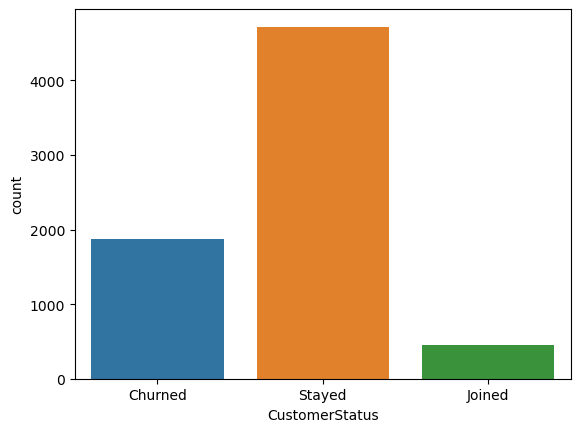

In [20]:
#Visualise the count of the customer Churn
sns.countplot(df['CustomerStatus'])

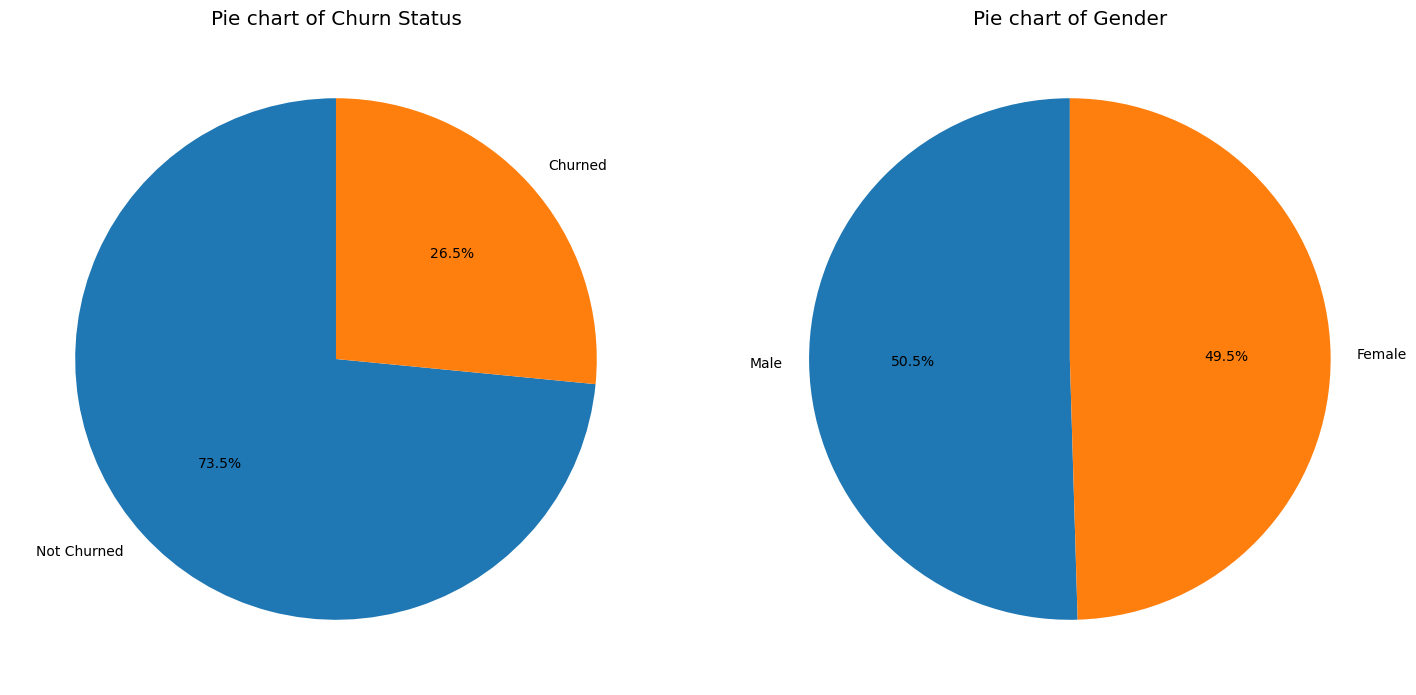

In [21]:
# Create a binary target variable: 1 if Churned, 0 otherwise
df['Churn'] = df['CustomerStatus'].apply(lambda x: 1 if x == 'Churned' else 0)

# Count the number of churned and non-churned customers
churn_counts = df['Churn'].value_counts()

# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

axes = axes.flatten()

style.use('ggplot')

# Plot the pie chart for churn_counts
axes[0].pie(churn_counts, labels=['Not Churned', 'Churned'], autopct='%1.1f%%', startangle=90)
axes[0].set_title("Pie chart of Churn Status")

# Plot the pie chart for Gender
gender_counts = telco_data['Gender'].value_counts()
axes[1].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title("Pie chart of Gender")

plt.tight_layout()
plt.show()

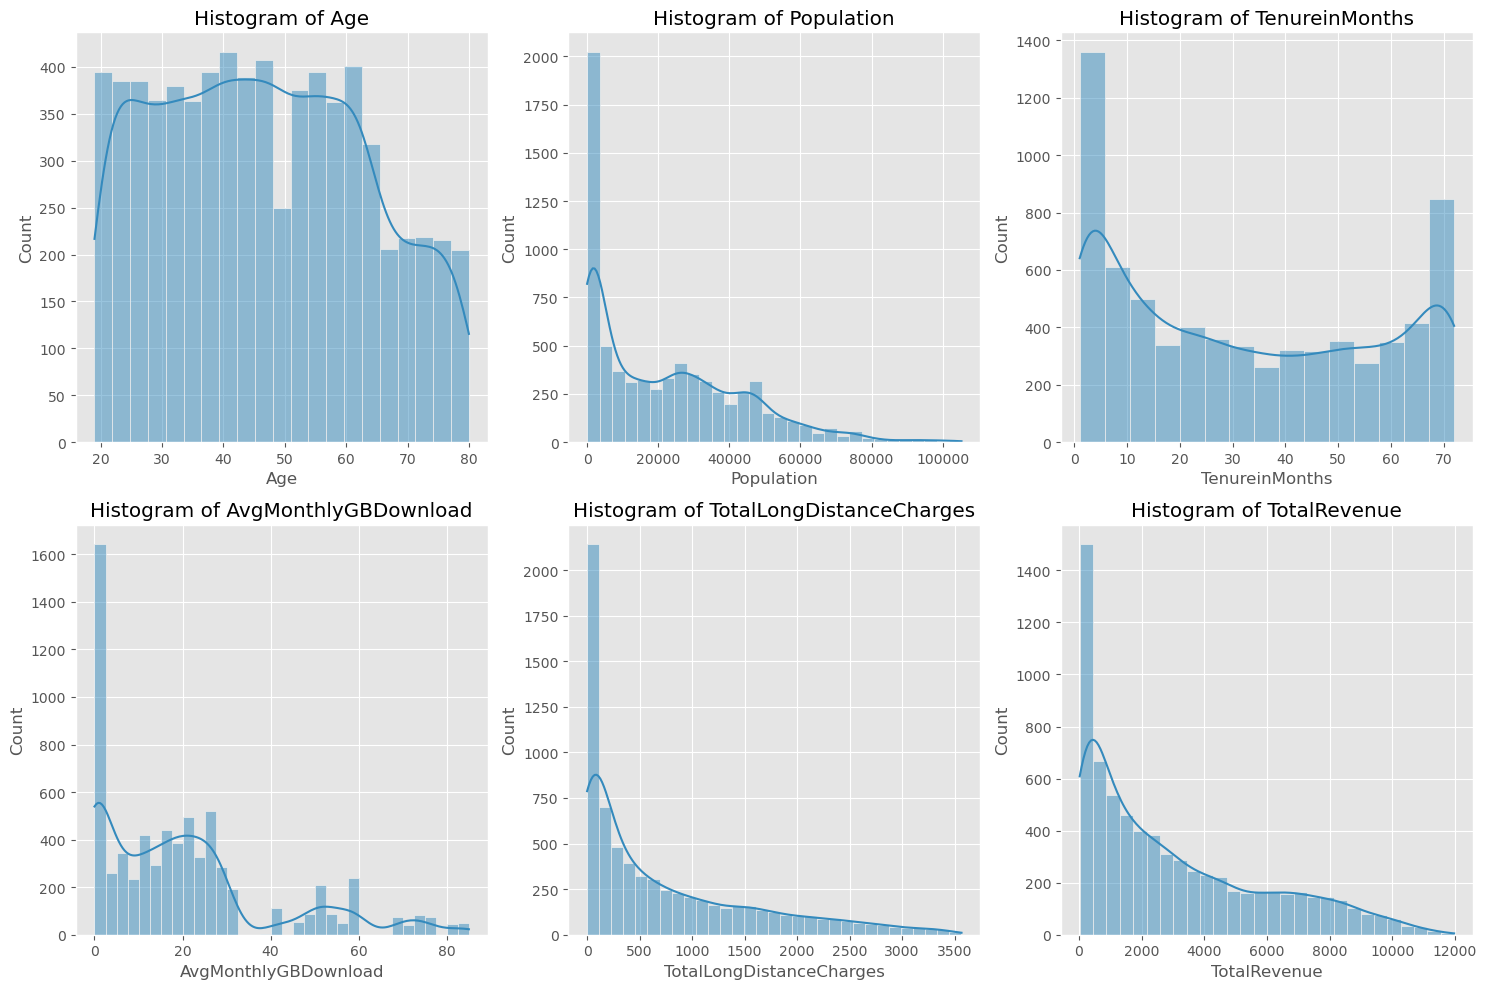

In [22]:
# to plot histograms for numerical features to understand the distribution of data
#set up subplots
fig, axes = plt.subplots(nrows =2, ncols = 3, figsize = (15,10))
#flatten the axis for easier indexing
axes = axes.flatten()
numerical_features = ['Age', 'Population', 'TenureinMonths', 'AvgMonthlyGBDownload', 'TotalLongDistanceCharges', 'TotalRevenue']
for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], kde=True, ax=axes[i])
    axes[i].set_title(f"Histogram of {feature}")
    
plt.tight_layout()
plt.show()

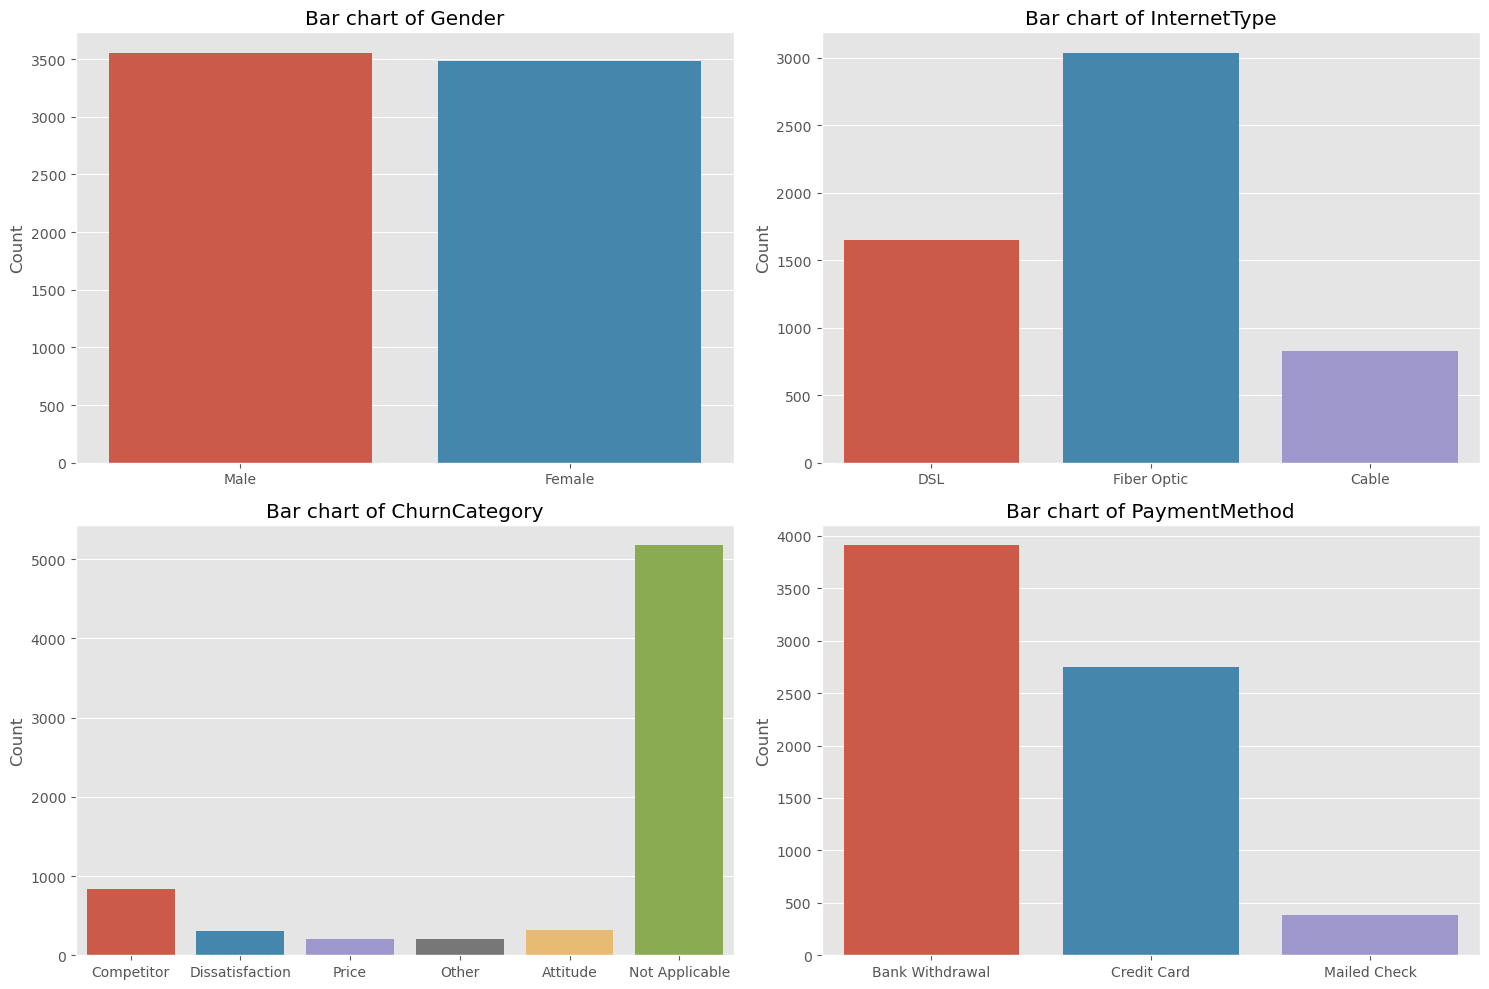

In [23]:
# to plot bar charts for categorical features
# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
#flatten the axis for easier indexing
axes = axes.flatten()

categorical_features = ["Gender", "InternetType", "ChurnCategory", "PaymentMethod"]

for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, data=df, ax=axes[i])
    axes[i].set_title(f"Bar chart of {feature}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")


plt.tight_layout()
plt.show()

In [24]:
# to understand the correlation between the variables
df.corr()

,Age,NumberofDependents,ZipCode,Latitude,Longitude,Population,NumberofReferrals,TenureinMonths,AvgMonthlyLongDistanceCharges,AvgMonthlyGBDownload,MonthlyCharge,TotalCharges,TotalRefunds,TotalExtraDataCharges,TotalLongDistanceCharges,TotalRevenue,SatisfactionScore,ChurnScore,CLTV,Churn
Age,1.000000,-0.119000,-0.008183,-0.010305,0.007612,-0.018881,-0.025141,0.009927,-0.011749,-0.376595,0.144685,0.059684,0.024168,0.025036,0.003065,0.048265,-0.085170,0.083919,-0.001826,0.115760
NumberofDependents,-0.119000,1.000000,0.016493,0.029081,-0.024271,-0.015486,0.278003,0.108237,-0.007324,0.129966,-0.131837,0.022535,0.014023,-0.014436,0.068966,0.038038,0.152873,-0.160743,0.049611,-0.218780
ZipCode,-0.008183,0.016493,1.000000,0.894769,-0.790564,-0.424067,0.001463,0.007146,0.005894,-0.010998,-0.010775,0.001978,-0.003797,-0.014550,0.005063,0.002944,0.002121,-0.018020,-0.003207,-0.016289
Latitude,-0.010305,0.029081,0.894769,1.000000,-0.885979,-0.434801,0.018715,0.011963,0.002631,-0.027676,-0.030325,-0.002784,-0.009901,-0.013233,0.008029,0.000082,0.022367,-0.037615,0.000214,-0.041546
Longitude,0.007612,-0.024271,-0.790564,-0.885979,1.000000,0.296288,-0.009893,-0.009672,-0.004341,0.030979,0.028429,0.003811,-0.000597,0.010461,-0.006923,0.001062,-0.009048,0.019394,-0.000513,0.024052
Population,-0.018881,-0.015486,-0.424067,-0.434801,0.296288,1.000000,-0.007704,-0.012102,-0.018665,0.024759,0.009597,-0.006434,0.019627,0.012031,-0.018640,-0.010546,-0.031056,0.020012,-0.000648,0.051649
NumberofReferrals,-0.025141,0.278003,0.001463,0.018715,-0.009893,-0.007704,1.000000,0.326975,0.006336,0.038575,0.028173,0.250378,0.024756,0.000350,0.216190,0.261853,0.188926,-0.202209,0.122843,-0.286540
TenureinMonths,0.009927,0.108237,0.007146,0.011963,-0.009672,-0.012102,0.326975,1.000000,0.014596,0.049119,0.247582,0.826074,0.059021,0.082266,0.674149,0.853146,0.210557,-0.224982,0.396292,-0.352861
AvgMonthlyLongDistanceCharges,-0.011749,-0.007324,0.005894,0.002631,-0.004341,-0.018665,0.006336,0.014596,1.000000,-0.030455,0.138396,0.069500,-0.018644,0.002414,0.599828,0.232291,0.001146,0.021857,0.023858,0.008120
AvgMonthlyGBDownload,-0.376595,0.129966,-0.010998,-0.027676,0.030979,0.024759,0.038575,0.049119,-0.030455,1.000000,0.391787,0.223268,0.002397,0.088939,0.011373,0.180726,-0.091657,0.022421,0.023043,0.048868


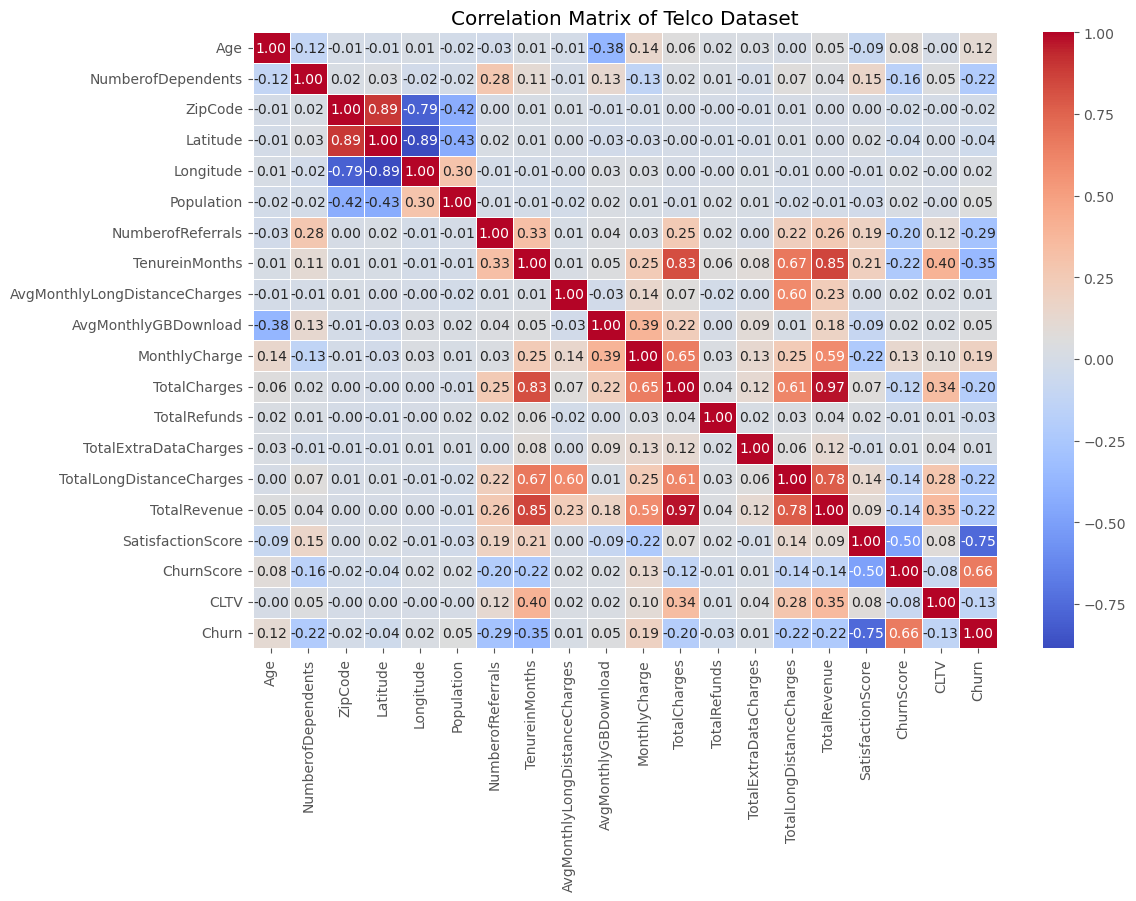

In [25]:
# To plot the correlation matrix
plt.figure(figsize=(12, 8))
cor = df.corr()
sns.heatmap(cor, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Telco Dataset')
plt.show()

In [26]:
# Check if 'ChurnReason' column is present
if 'ChurnReason' in df.columns:
    churn_reasons = df['ChurnReason'].value_counts()
    print(churn_reasons)
else:
    print("Column 'ChurnReason' not found in the dataset.")

Not Applicable                               5174
Competitor had better devices                 313
Competitor made better offer                  311
Attitude of support person                    220
Don't know                                    130
Competitor offered more data                  117
Competitor offered higher download speeds     100
Attitude of service provider                   94
Price too high                                 78
Product dissatisfaction                        77
Network reliability                            72
Long distance charges                          64
Service dissatisfaction                        63
Moved                                          46
Extra data charges                             39
Limited range of services                      37
Poor expertise of online support               31
Lack of affordable download/upload speed       30
Lack of self-service on Website                29
Poor expertise of phone support                12


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as f

In [28]:
#Remove uncessary data
clean_df = df.drop(labels=['CustomerID', 'Country', 'State', 'City', 'Quarter', 'ZipCode', 'Latitude', 'Longitude', 'Population', 'AvgMonthlyLongDistanceCharges', 'AvgMonthlyGBDownload', 'MonthlyCharge', 'TotalCharges', 'TotalRefunds', 'TotalLongDistanceCharges', 'TotalRevenue', 'ReferredaFriend', 'NumberofReferrals', 'PremiumTechSupport', 'SatisfactionScore', 'CLTV', 'TotalExtraDataCharges', 'ChurnScore', 'CustomerStatus', 'ChurnCategory', 'ChurnReason', 'Churn'], axis=1)

#Look at the number of rows and Columns
clean_df.shape

(7043, 24)

In [29]:
df = clean_df

In [30]:
df.columns

Index(['Gender', 'Age', 'Under30', 'SeniorCitizen', 'Married', 'Dependents',
       'NumberofDependents', 'TenureinMonths', 'Offer', 'PhoneService',
       'MultipleLines', 'InternetService', 'InternetType', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtectionPlan', 'StreamingTV',
       'StreamingMovies', 'StreamingMusic', 'UnlimitedData', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'ChurnLabel'],
      dtype='object')

In [31]:
# Encoding categorical variables

#Create a label encoder object
lab_enc = LabelEncoder()

# transform categorical columns with Label Encoder
categorical_features = df.select_dtypes(include=['object']).columns
for feature in categorical_features:
    df[feature] = lab_enc.fit_transform(df[feature])

# Logistic Regression

Classification Report
                precision    recall  f1-score   support

0: Not Churned       0.91      0.74      0.82      1009
    1: Churned       0.56      0.81      0.66       400

      accuracy                           0.76      1409
     macro avg       0.73      0.78      0.74      1409
  weighted avg       0.81      0.76      0.77      1409

Logistic Regression
[[751 258]
 [ 76 324]]


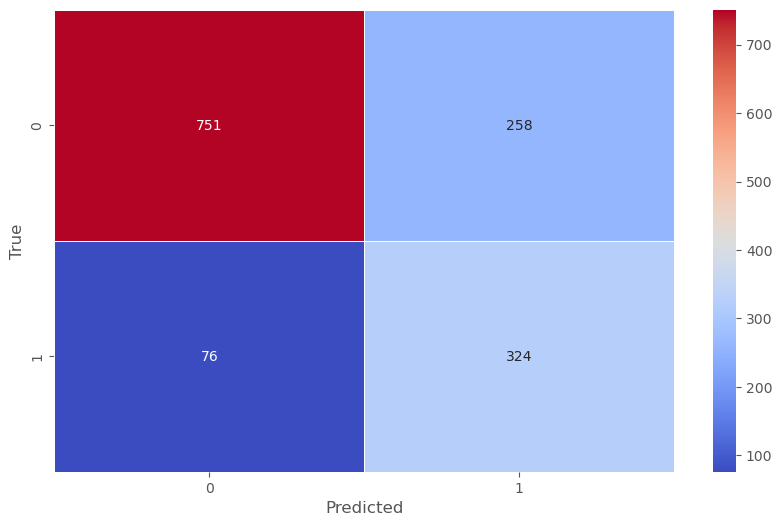

Coefficients:
                 Feature  Coefficient
20              Contract    -1.151214
5             Dependents    -0.796686
7         TenureinMonths    -0.703286
11       InternetService     0.584744
18        StreamingMusic     0.240480
3          SeniorCitizen     0.235072
10         MultipleLines     0.186590
4                Married     0.176123
12          InternetType     0.169104
16           StreamingTV     0.160075
13        OnlineSecurity    -0.156532
21      PaperlessBilling     0.129030
2                Under30    -0.103603
6     NumberofDependents     0.088507
22         PaymentMethod    -0.053268
19         UnlimitedData    -0.032828
0                 Gender    -0.026880
15  DeviceProtectionPlan    -0.025496
9           PhoneService    -0.025379
1                    Age     0.020469
14          OnlineBackup    -0.015381
17       StreamingMovies     0.015061
8                  Offer     0.009940


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define the independent variables and dependent variable
X = df.drop('ChurnLabel', axis=1)
y = df['ChurnLabel']

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the Logistic Regression model with class_weight to handle class imbalance
lr = LogisticRegression(solver='liblinear', max_iter=200, class_weight='balanced')

# Train the Logistic Regression model on the training data
lr.fit(X_train, y_train)

# Predictions on the testing set
pred_lr = lr.predict(X_test)

# Printing the classification report
print('Classification Report')
print(classification_report(y_test, pred_lr, target_names=['0: Not Churned', '1: Churned']))

# Creating confusion matrix
confusion_mat = confusion_matrix(y_test, pred_lr)
print("Logistic Regression")
print(confusion_mat)

# Plot confusion matrix
plt.figure(figsize=(10,6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap='coolwarm', linewidths=0.5)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Displaying the coefficients
coefficients = lr.coef_[0]
feature_names = df.drop('ChurnLabel', axis=1).columns

# Combine feature names and their corresponding coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the coefficients by their absolute value
coef_df['abs_coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values('abs_coefficient', ascending=False)

print("Coefficients:")
print(coef_df[['Feature', 'Coefficient']])


The intersection of each row and column provides distinct insights into the results, revealing True Positives (TP), True Negatives (TN), False Positives (FP), or False Negatives (FN).

# Decision Tree Classifier

In [34]:
from sklearn.tree import DecisionTreeClassifier

def train_decision_tree(X_train, y_train, random_state=42):
    # Create a Decision Tree classifier instance with class_weight to handle class imbalance
    tree = DecisionTreeClassifier(random_state=random_state, class_weight='balanced')

    # Train the Decision Tree classifier on the training data
    tree.fit(X_train, y_train)
    return tree

# Train the Decision Tree classifier with the refined function
trained_tree = train_decision_tree(X_train, y_train)

# Use the trained Decision Tree classifier to make predictions on the test set
y_pred = trained_tree.predict(X_test)

# Display the counts of each class in the true labels (y_test)
class_counts = y_test.value_counts()
print("Class counts in y_test:")
print(class_counts)


Class counts in y_test:
0    1009
1     400
Name: ChurnLabel, dtype: int64


Classification Report
                precision    recall  f1-score   support

0: Not Churned       0.83      0.82      0.82      1009
    1: Churned       0.55      0.56      0.56       400

      accuracy                           0.74      1409
     macro avg       0.69      0.69      0.69      1409
  weighted avg       0.75      0.74      0.75      1409

Decision Tree Classifier
[[823 186]
 [174 226]]


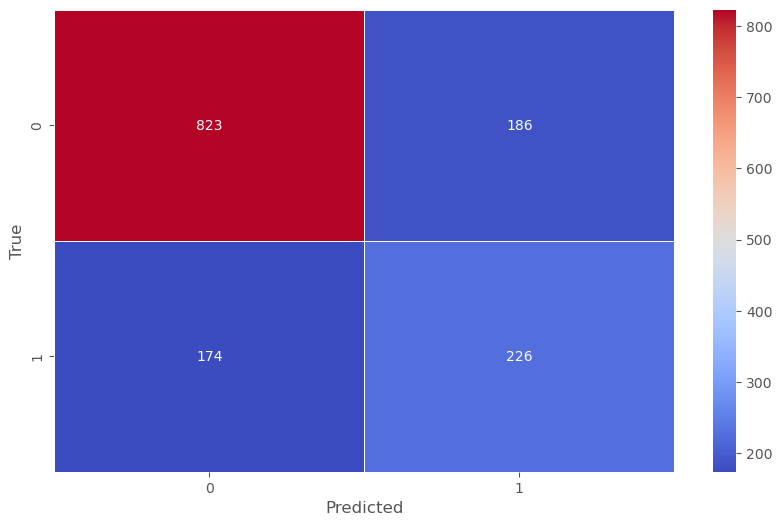

In [36]:
# printing the classification report
print('Classification Report')
print(classification_report(y_test, y_pred, target_names=['0: Not Churned', '1: Churned']))

#creating confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Decision Tree Classifier")
print(confusion_mat)

#plot confusion matrix
plt.figure(figsize=(10,6))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap='coolwarm', linewidths=0.5)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Random Forest

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Best parameters found:  {'bootstrap': True, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best Random Forest Performance:
              precision    recall  f1-score   support

           0       0.90      0.85      0.87      1009
           1       0.66      0.77      0.71       400

    accuracy                           0.82      1409
   macro avg       0.78      0.81      0.79      1409
weighted avg       0.83      0.82      0.83      1409

[[854 155]
 [ 94 306]]


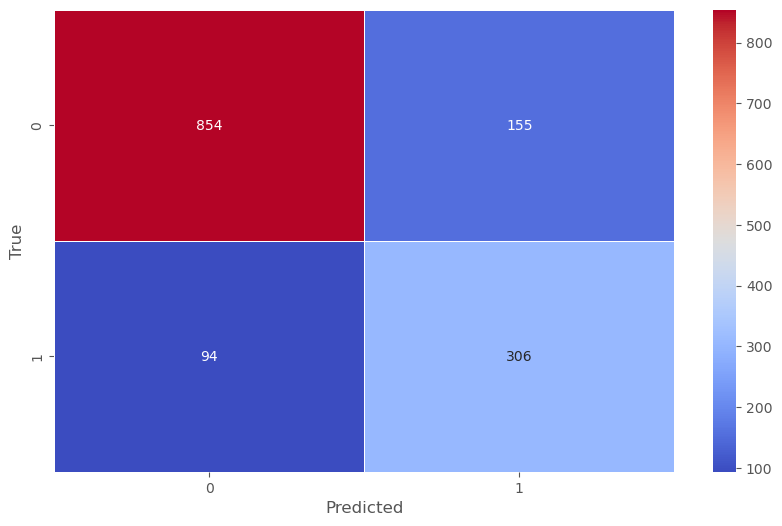

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

# Initialize the Random Forest Classifier
rand_forest = RandomForestClassifier(class_weight='balanced', random_state=42)

# Initialize Grid Search with cross-validation
grid_search = GridSearchCV(estimator=rand_forest, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='f1')

# Fit the Grid Search model to find the best parameters
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_rand_forest = grid_search.best_estimator_

# Print the best parameters
print("Best parameters found: ", best_params)

# Make predictions with the best model
y_pred_best_rf = best_rand_forest.predict(X_test)

print("Best Random Forest Performance:")
# Print the classification report
print(classification_report(y_test, y_pred_best_rf))

# Get the confusion matrix
conf_mat_best_rf = confusion_matrix(y_test, y_pred_best_rf)
print(conf_mat_best_rf)

# Plot confusion matrix
plt.figure(figsize=(10,6))
sns.heatmap(conf_mat_best_rf, annot=True, fmt="d", cmap='coolwarm', linewidths=0.5)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



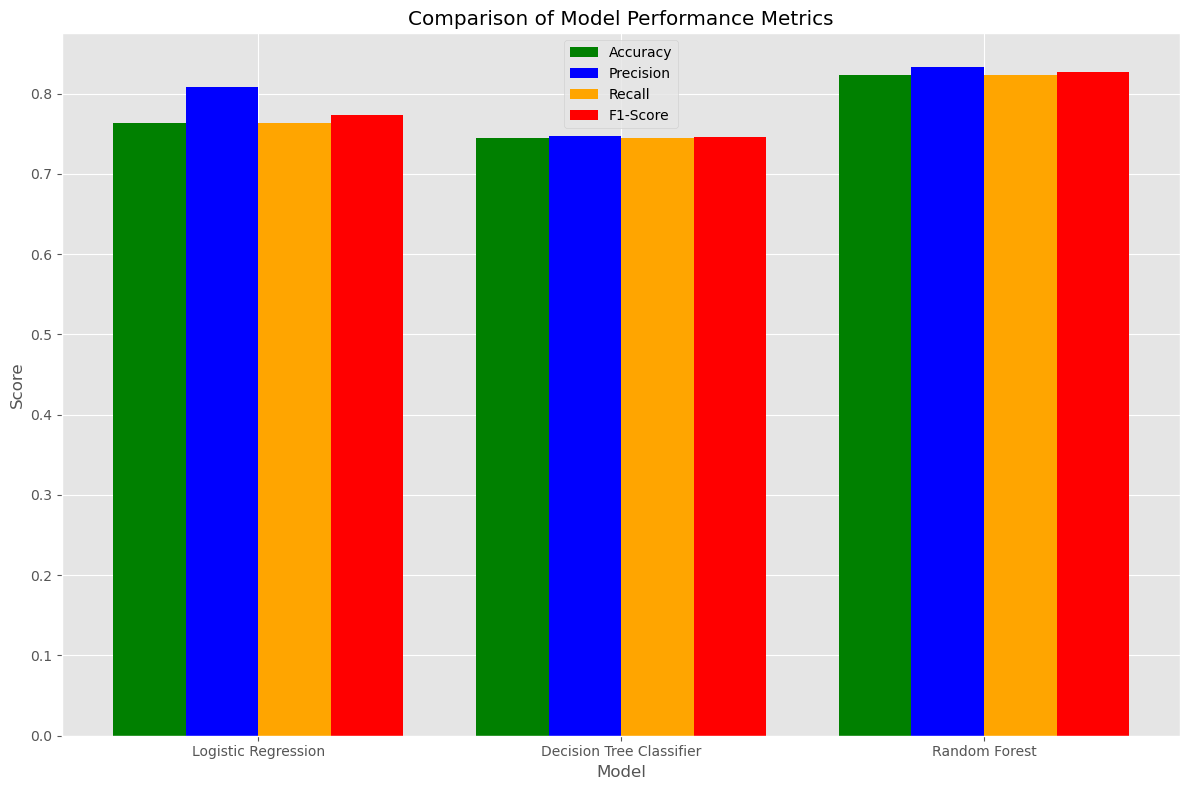

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
# Calculate precision, recall, and f1-score for each model
metrics = {
    'Logistic Regression': {
        'accuracy': accuracy_score(y_test, pred_lr),
        'precision': precision_score(y_test, pred_lr, average='weighted'),
        'recall': recall_score(y_test, pred_lr, average='weighted'),
        'f1': f1_score(y_test, pred_lr, average='weighted')
    },
    'Decision Tree Classifier': {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, average='weighted'),
        'recall': recall_score(y_test, y_pred, average='weighted'),
        'f1': f1_score(y_test, y_pred, average='weighted')
    },
    'Random Forest': {
        'accuracy': accuracy_score(y_test, y_pred_best_rf),
        'precision': precision_score(y_test, y_pred_best_rf, average='weighted'),
        'recall': recall_score(y_test, y_pred_best_rf, average='weighted'),
        'f1': f1_score(y_test, y_pred_best_rf, average='weighted')
    }
}

# Create lists to store the metrics for plotting
model_names = list(metrics.keys())
accuracy_values = [metrics[model]['accuracy'] for model in model_names]
precision_values = [metrics[model]['precision'] for model in model_names]
recall_values = [metrics[model]['recall'] for model in model_names]
f1_values = [metrics[model]['f1'] for model in model_names]

# Set up the bar width and the positions of the bars on the x-axis
bar_width = 0.2
x = range(len(model_names))

# Create the grouped bar chart
plt.figure(figsize=(12, 8))
plt.bar(x, accuracy_values, width=bar_width, label='Accuracy', color='green')
plt.bar([i + bar_width for i in x], precision_values, width=bar_width, label='Precision', color='blue')
plt.bar([i + 2 * bar_width for i in x], recall_values, width=bar_width, label='Recall', color='orange')
plt.bar([i + 3 * bar_width for i in x], f1_values, width=bar_width, label='F1-Score', color='red')

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Comparison of Model Performance Metrics')
plt.xticks([i + 1.5 * bar_width for i in x], model_names)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

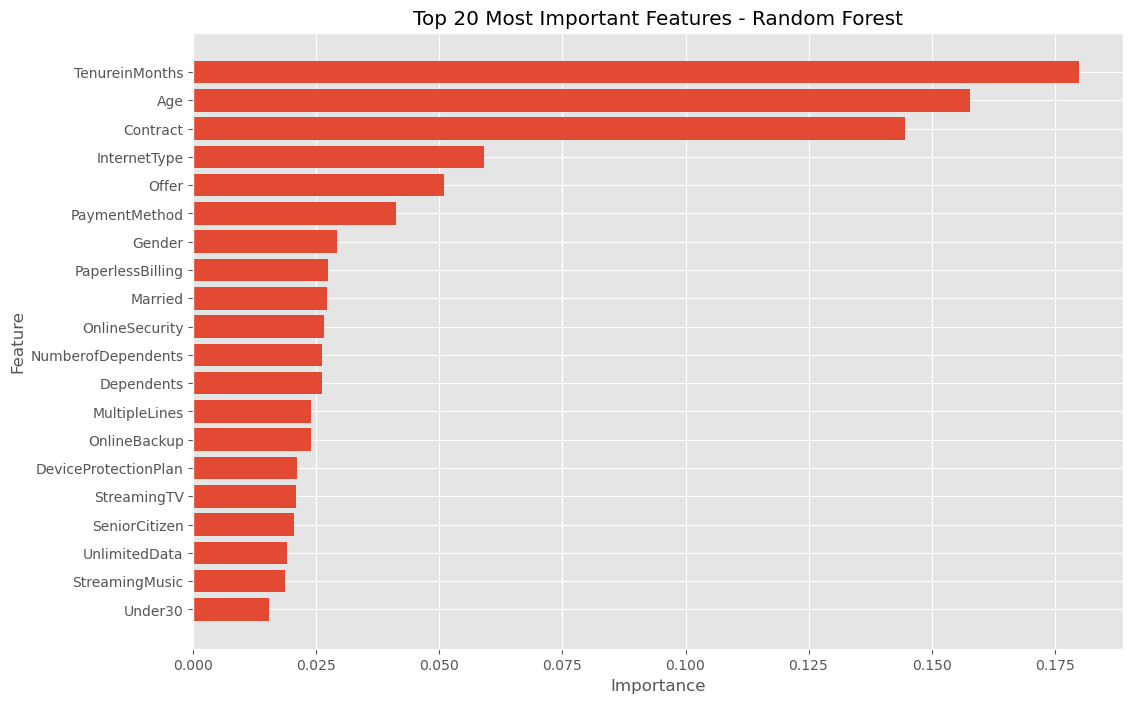

In [39]:
# Random forest Model Feature Importance
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)

# Extract Feature Importance
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize Feature Importance
plt.figure(figsize=(12, 8))

# Display top 20 features
plt.barh(feature_importance_df['Feature'].head(20), feature_importance_df['Importance'].head(20))
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Most Important Features - Random Forest')
plt.gca().invert_yaxis()
plt.show()

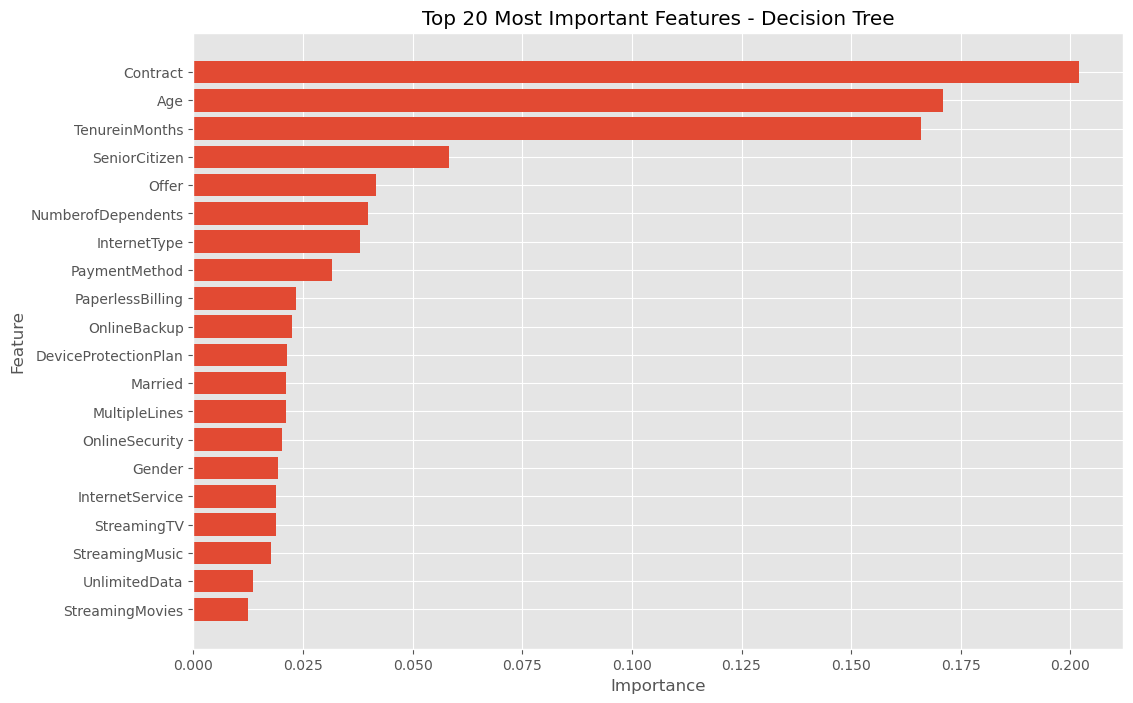

In [40]:
 # calculating the top 20 most important features

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Define the independent variables and dependent variables
X = df.drop('ChurnLabel', axis=1)
y = df['ChurnLabel']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Extract Feature Importance
importances = dt_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize Feature Importance
plt.figure(figsize=(12, 8))

 # Display top 20 features
plt.barh(feature_importance_df['Feature'].head(20), feature_importance_df['Importance'].head(20))
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Most Important Features - Decision Tree')
plt.gca().invert_yaxis()
plt.show()


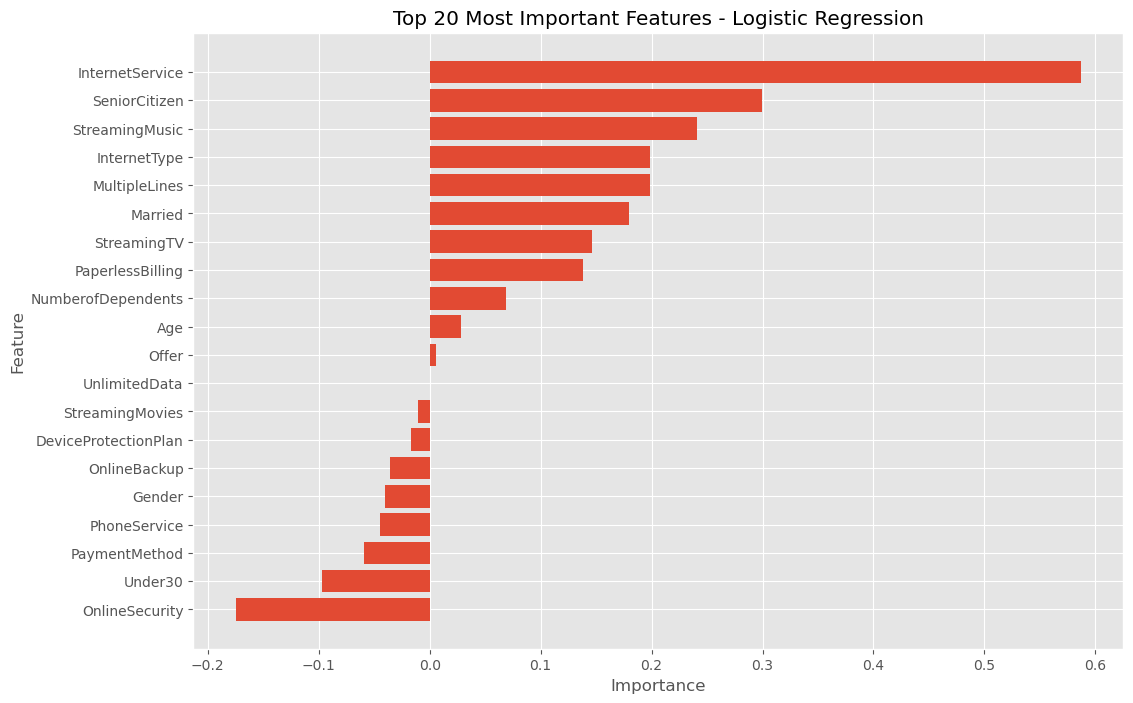

In [41]:
# calculating the top 20 most important features
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Define the independent variables and dependent variables
X = df.drop('ChurnLabel', axis=1)
y = df['ChurnLabel']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Logistic Regression Model
lr_model = LogisticRegression(solver='liblinear', max_iter=200)
lr_model.fit(X_train_scaled, y_train)

# Extract Feature Importance (coefficients)
importances = lr_model.coef_[0]
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize Feature Importance
plt.figure(figsize=(12, 8))

 # Display top 20 features
plt.barh(feature_importance_df['Feature'].head(20), feature_importance_df['Importance'].head(20))
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Most Important Features - Logistic Regression')
plt.gca().invert_yaxis()
plt.show()

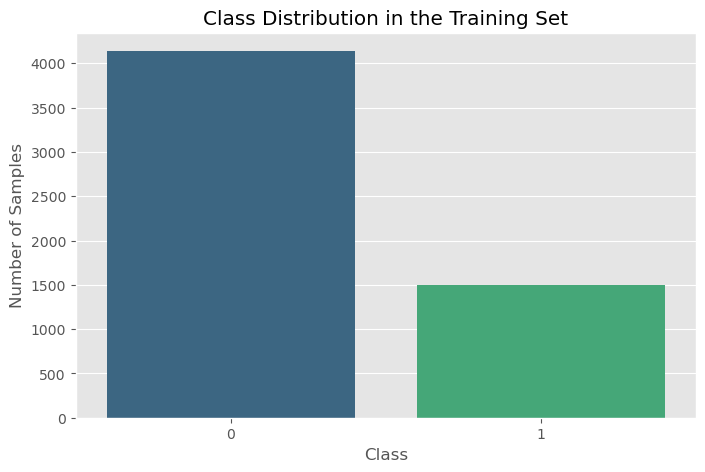

Training Set Class Distribution:
 0    4139
1    1495
Name: ChurnLabel, dtype: int64


In [42]:
# calculating class distribution for the training set

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

class_distribution_train = y_train.value_counts()

# Plot the distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=class_distribution_train.index, y=class_distribution_train.values, palette='viridis')
plt.title('Class Distribution in the Training Set')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.show()

# Print the distribution
print("Training Set Class Distribution:\n", class_distribution_train)


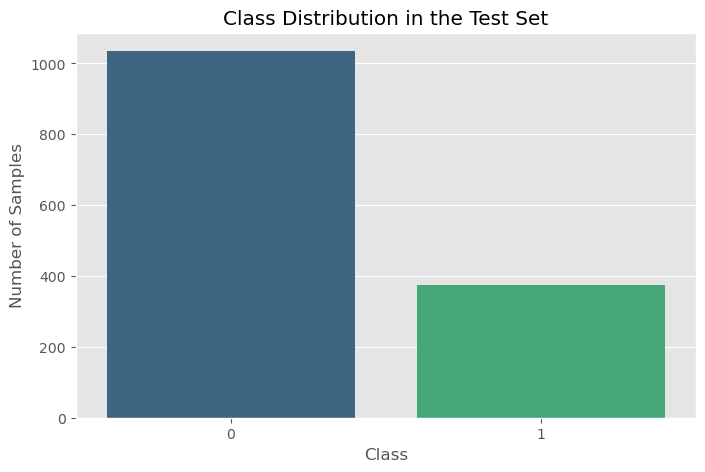

Test Set Class Distribution:
 0    1035
1     374
Name: ChurnLabel, dtype: int64


In [43]:
# calculating class distribution for the test set

class_distribution_test = y_test.value_counts()

# Plot the distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=class_distribution_test.index, y=class_distribution_test.values, palette='viridis')
plt.title('Class Distribution in the Test Set')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.show()

# Print the distribution
print("Test Set Class Distribution:\n", class_distribution_test)
